Implemented Python libraries and dataset cleaning. Also conducted exploratory data analysis

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

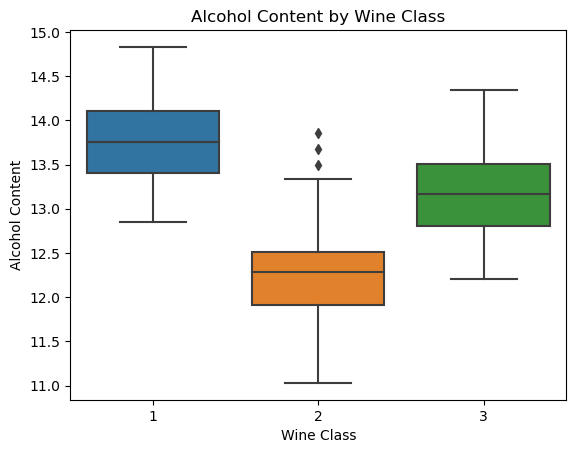

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
column_names = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                '0D280/0D315 of diluted wines', 'Proline']
wine_data = pd.read_csv('Data/wine.data', header=None, names=column_names)
print(wine_data.describe())
print(wine_data.info())
if isinstance(wine_data['Class'].dtype, pd.CategoricalDtype):
    sns.boxplot(x='Class', y='Alcohol', data=wine_data)
else:
    sns.boxplot(x='Class', y='Alcohol', data=wine_data.astype({'Class': 'category'}))
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('Alcohol Content')
plt.show()

Implemented Scikit-Learn tools and a machine learning pipeline using Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

X = wine_data.drop('Class', axis=1)
y = wine_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [48]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        17
           3       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



Implemented a second classifier to test data: Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [73]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy2:.2f}')
print(classification_report(y_test, y_pred2))

Accuracy: 0.92
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        17
           3       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



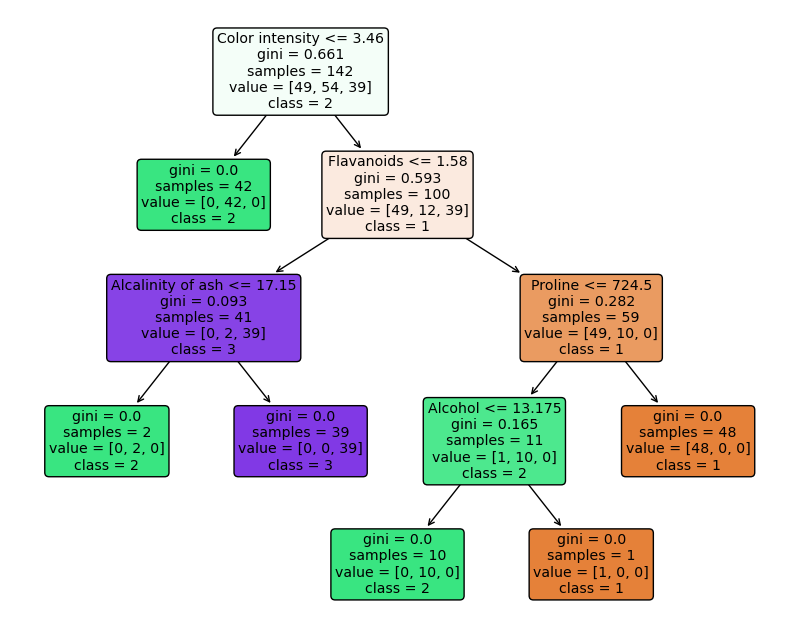

In [74]:
plt.figure(figsize=(10, 8))
plot_tree(model2, feature_names=X.columns.tolist(), 
          class_names=[str(i) for i in model2.classes_], filled=True, rounded=True)
plt.show()